# Pymaceuticals Inc.
---

### Observations and Insights
- *Your observations and insights here* ...
1. There is a strong correlation between a mouse's weight and average tumor volume for the Capomulin regimen.
2. While Capomulin has one of the lowest mean tumor volumes in this dataset, this alone can't be conclusive, as the summary statistics table includes all timepoints, and the tumor volume at the beginning of a mouse's treatment can vary.
3. It seems that the amount of time that a mouse's treatment is observed varies between either the type of treatment or the mouse itself. It is unclear if this is intended or if it affects the quality of the data, but it did make finding the duplicate mouse difficult in the beginning without using the .duplicated() function.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview

combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
count_mice = combined_df.value_counts(['Mouse ID'])
amount_mice = len(count_mice)
print(amount_mice)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_df.duplicated(['Mouse ID', 'Timepoint'])
combined_df.loc[duplicate_mouse]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
count_mice = clean_df.value_counts(['Mouse ID'])
amount_mice = len(count_mice)
print(amount_mice)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_df = clean_df.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_mean = grouped_df['Tumor Volume (mm3)'].mean()
tumor_median = grouped_df['Tumor Volume (mm3)'].median()
tumor_variance = grouped_df['Tumor Volume (mm3)'].var()
tumor_std = grouped_df['Tumor Volume (mm3)'].std()
tumor_sem = grouped_df['Tumor Volume (mm3)'].sem()
drug_summary = pd.DataFrame({
    'Mean Tumor Volume' : tumor_mean,
    'Median Tumor Volume' : tumor_median,
    'Tumor Volume Variance' : tumor_variance,
    'Tumor Volume Std. Dev.' : tumor_std,
    'Tumor Volume Std. Err.' : tumor_sem
})

drug_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_variables = {'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']}
# Using the aggregation method, produce the same summary statistics in a single line
aggregate = grouped_df.agg(summary_variables)
aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

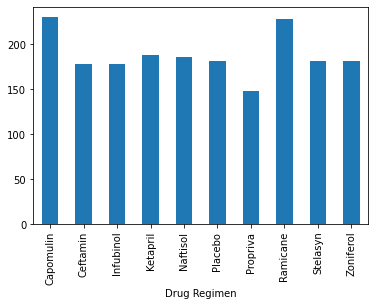

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_total = grouped_df['Mouse ID'].count()
barchart = measurements_total.plot(kind = "bar")
barchart

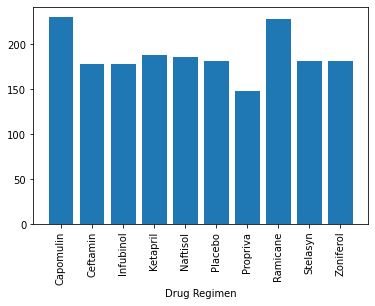

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
x_axis = np.arange(len(grouped_df['Drug Regimen']))
y_values = measurements_total
plt.bar(x_axis, y_values)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation = 90)
plt.xlabel('Drug Regimen')
plt.show()



<AxesSubplot:ylabel='Sex'>

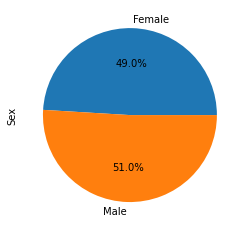

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female_df = clean_df.groupby('Sex')
male_female = male_female_df['Sex'].count()
piechart = male_female.plot(kind = "pie", autopct='%1.1f%%')
piechart

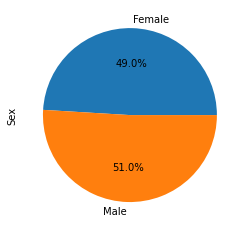

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#reusing male_female variable
labels = ['Female', 'Male']
plt.pie(male_female, labels = labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouse_grouped_df = clean_df.groupby("Mouse ID")
last_timepoint = mouse_grouped_df["Timepoint"].max()
timepoint_df = pd.DataFrame(last_timepoint)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_df = timepoint_df.merge(clean_df, on = ("Mouse ID", "Timepoint"), how = "left")
tumor_volume_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume_df = tumor_volume_df[tumor_volume_df['Drug Regimen'].isin(treatment_list)]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


for drug in treatment_list:
    outlier_count = 0
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = tumor_volume_df[tumor_volume_df['Drug Regimen'] == drug]
    # add subset 
    tumor_volumes = drug_df['Tumor Volume (mm3)']
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_low_df = drug_df[drug_df['Tumor Volume (mm3)'] <= lower_bound]
    outlier_high_df = drug_df[drug_df['Tumor Volume (mm3)'] >= upper_bound]
    outliers_total_df = pd.merge(outlier_low_df, outlier_high_df)
    outlier_amount = len(outlier_low_df['Tumor Volume (mm3)']) + len(outlier_high_df['Tumor Volume (mm3)'])
    print(f'{drug} has {outlier_amount} outliers')
  
    


Capomulin has 0 outliers
Ramicane has 0 outliers
Infubinol has 1 outliers
Ceftamin has 0 outliers


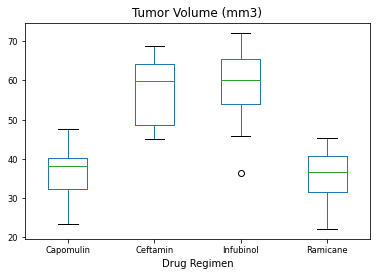

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_volume_df.boxplot(column= 'Tumor Volume (mm3)', by = 'Drug Regimen', fontsize = 'small', grid = False)
plt.suptitle('')
plt.show()

## Line and Scatter Plots

In [16]:
#reducing dataframe to contain only Capomulin treatments and selecting first mouse seen on dataframe
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


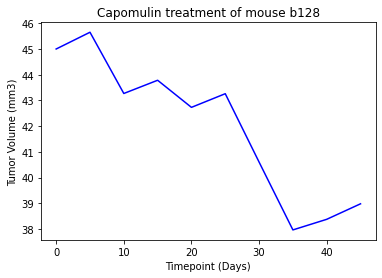

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#using mouse b128
selected_mouse_data = clean_df[clean_df['Mouse ID'] == 'b128']
tumor_volume_list = selected_mouse_data['Tumor Volume (mm3)']
timepoint_list = selected_mouse_data['Timepoint']
plt.plot(timepoint_list, tumor_volume_list, color = 'blue')
plt.title('Capomulin treatment of mouse b128')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

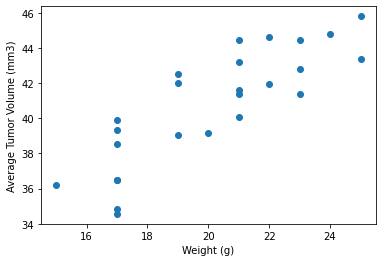

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_grouped = capomulin_df.groupby('Mouse ID')
y_values = capomulin_grouped['Tumor Volume (mm3)'].mean()
#using .mean() on below line because weight should be constant
x_axis = capomulin_grouped['Weight (g)'].mean()
plt.scatter(x_axis, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between weight and the average tumor volume is 0.8419363424694718


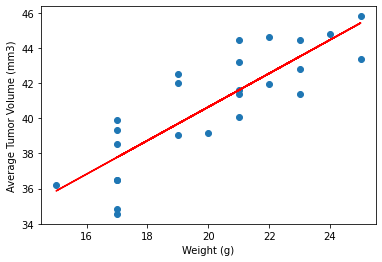

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = x_axis
y_values = y_values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_values)
plt.scatter(x_axis, y_values)
print(f"The correlation between weight and the average tumor volume is {rvalue}")
plt.plot(x_axis,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()